In [1]:
cd /home/karen/Documents/GitHub/Muscle_wasting

/home/karen/Documents/GitHub/Muscle_wasting


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# USE CASE 2

-- oNetwork: "UseCases/UseCase2/usecase2.cyjs"
-- path_DDS_data: "UseCases/UseCase2/dds_join.csv"
-- path_tissue_data: "/home/karen/Documents/GitHub/Muscle_wasting/data/gene_tissue_Sarcopenia_relevant.csv"
--path_cell_type_data: "/home/karen/Documents/GitHub/Muscle_wasting/data/proportion_cell_type_div_Sarcopenia_relevant.csv"
-- path_pathway_file: "UseCases/UseCase2/pathway_join.csv"
-- path_tf_file: "UseCases/UseCase2/tf_join.csv"
-- page_rank_cutoff: [0.95 0.99]
-- coefficients: {'dds': 20, 'tissue': 1, 'cellular': 1, 'pathway_svd': 1, 'tf': 1, 'miR_enhancement':1}
--network_name UseCase2

In [17]:
import mirna_scoring.mirna_impact as mis
import mirna_scoring.mirna_influence_plots as mi_plot
from network.network_processing import load_graph

In [3]:
session_name = 'UseCase_2'

Fisrt we create the output folder for the results

And we load the output form MiRNA Network

In [4]:
network = load_graph(f"UseCases/UseCase2/complete_n_tf_mirnas__UseCase2_cutoff_0.9.pkl")
mirna_network=mis.mirna_network(network)
evaluation = mis.mirna_evaluation(mirna_network, session_name)

Directory already exists!


We can just use the function quick scoring, that will score each microRNA for:
- Influence on up and down regulated genes
- Number of Differentially express genes hit
- The weight of the node (calculated on miRKat Network)
- Random walk pathway influence.

This are factual values of the microRNA, there was already a filtering on mirKat Network

In [5]:
len(evaluation.get_all_mirnas())

57

To select the microRNAs, we see 3 factors
- How extreme are their values, if they have heavy outliers it gets added to the list
- Is the top performer on one of the categorties
- It is in the top for several 
- Has the most favorable up regulated genes activation
- Has the most favorable down regulated genes inhibition.

We then get the intersection

In [9]:
evaluation_df = evaluation.score(steps=10, sample_size=100, dds_threshold=2, pathway_keywords=['ATP', 'MUSCLE', "MYO"])

In [10]:
aa=evaluation.select_mirnas()
dict(zip(list(aa),[list(aa).count(i) for i in list(aa)]))

{'hsa-miR-106b-5p': 1,
 'hsa-miR-218-5p': 2,
 'hsa-miR-150-5p': 2,
 'hsa-miR-107': 4,
 'hsa-miR-124-3p': 3,
 'hsa-miR-106a-5p': 2,
 'hsa-miR-20a-5p': 2,
 'hsa-miR-130a-3p': 2,
 'hsa-miR-9-5p': 2,
 'hsa-miR-15a-5p': 1}

In [12]:
len(mirna_network.miR_nodes)/3

19.0

In [13]:
n_clusters = len(mirna_network.miR_nodes)//3

In [14]:
evaluation.cluster_mirnas(n_clusters=n_clusters)

Cluster labels:
 [ 5  0  0 17 16 17 17  4  2  6 17 13 13 13  8  8  4  5  0  0  0  0  9 14
 10 18 11 11 18 16 10 10  1  7  2  0 12 12  3  7  0  1 10  3  6 14 18 10
 15  4 15  1  3  4 10  9  1]


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


{3: ['hsa-miR-124-3p'],
 13: ['hsa-miR-106a-5p', 'hsa-miR-20a-5p'],
 14: ['hsa-miR-150-5p', 'hsa-miR-107'],
 0: ['hsa-miR-218-5p', 'hsa-miR-9-5p', 'hsa-miR-15a-5p'],
 10: ['hsa-miR-106b-5p'],
 15: ['hsa-miR-130a-3p']}

Since many of the mirnas may behave the same, we cluster based on their impact on the genes (how often they reach the gene, if they rach with a -1 or 1) as shown in plot


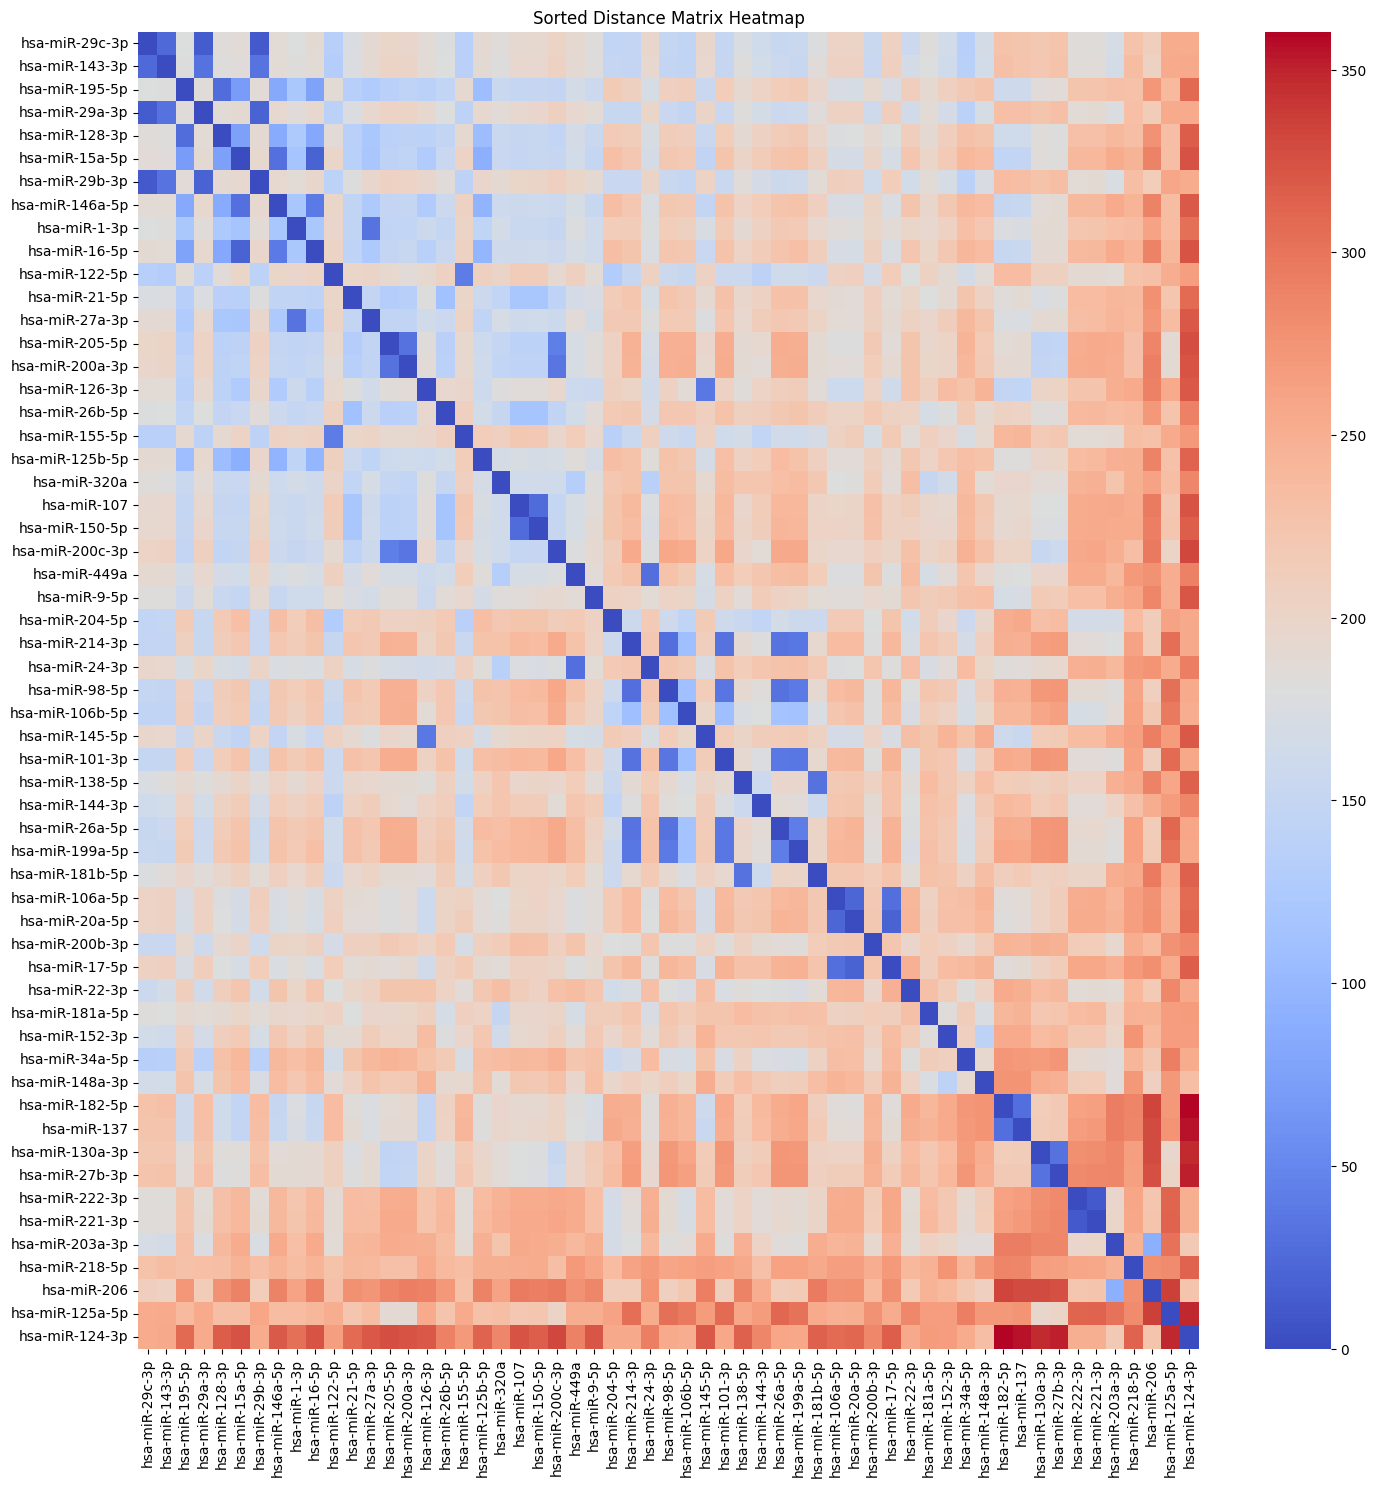

In [18]:
dist_df = mirna_network.get_mirnas_similarity()
mi_plot.plot_mirnas_similarirty(dist_df)


Now that the mirnas are assiged to a cluster, we can proceed with the plot of the smaller networks.
This will be the microRNAs and the genes they reached on the random walk. 
On the plot we also add the pathway enrichment of the targets reached for that mirna.
This it done in 2 ways, mirna indoviodually and by cluster.


mirna_scoring/results/UseCase_2/cluster_3.html
Saved on mirna_scoring/results/UseCase_2/cluster_3.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


mirna_scoring/results/UseCase_2/cluster_13.html
Saved on mirna_scoring/results/UseCase_2/cluster_13.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


mirna_scoring/results/UseCase_2/cluster_14.html
Saved on mirna_scoring/results/UseCase_2/cluster_14.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


mirna_scoring/results/UseCase_2/cluster_0.html
Saved on mirna_scoring/results/UseCase_2/cluster_0.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


mirna_scoring/results/UseCase_2/cluster_10.html
Saved on mirna_scoring/results/UseCase_2/cluster_10.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


mirna_scoring/results/UseCase_2/cluster_15.html
Saved on mirna_scoring/results/UseCase_2/cluster_15.html


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


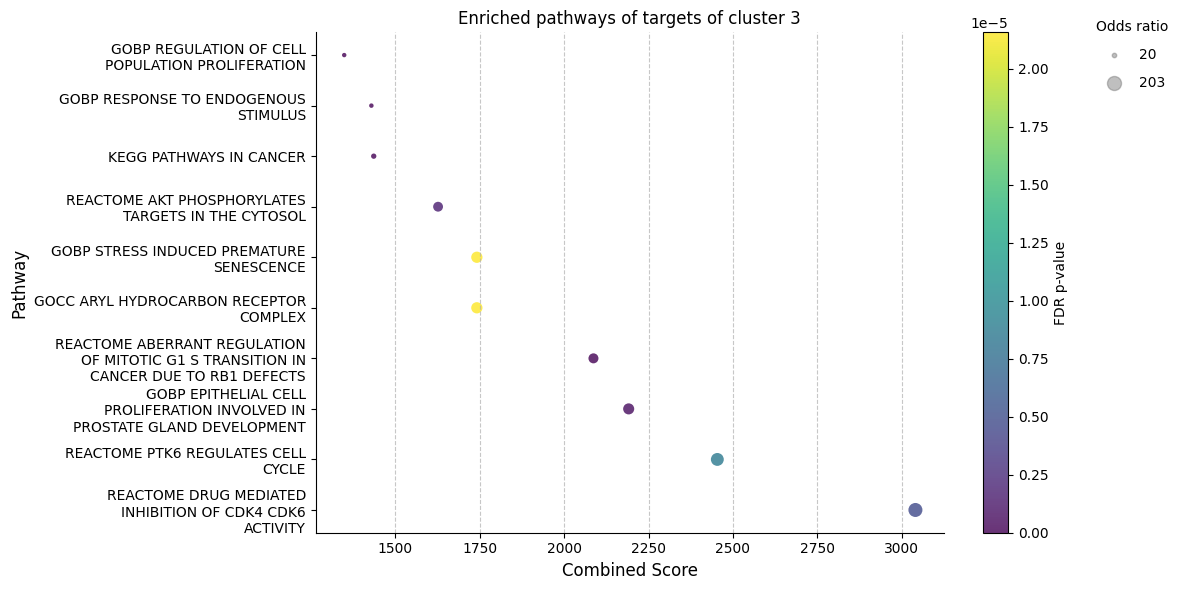

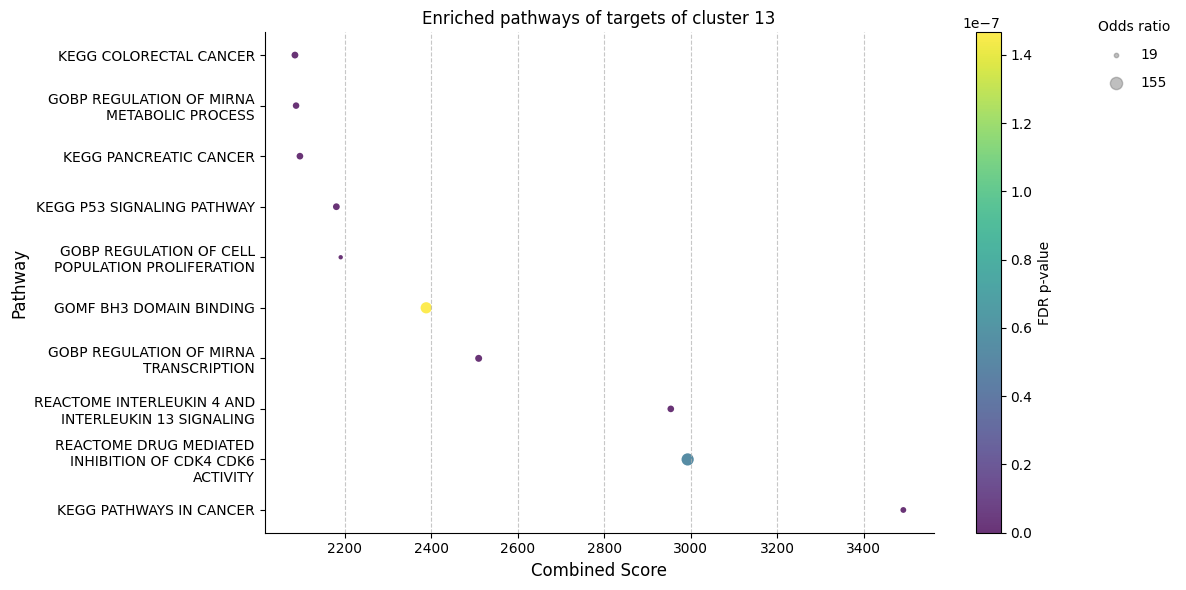

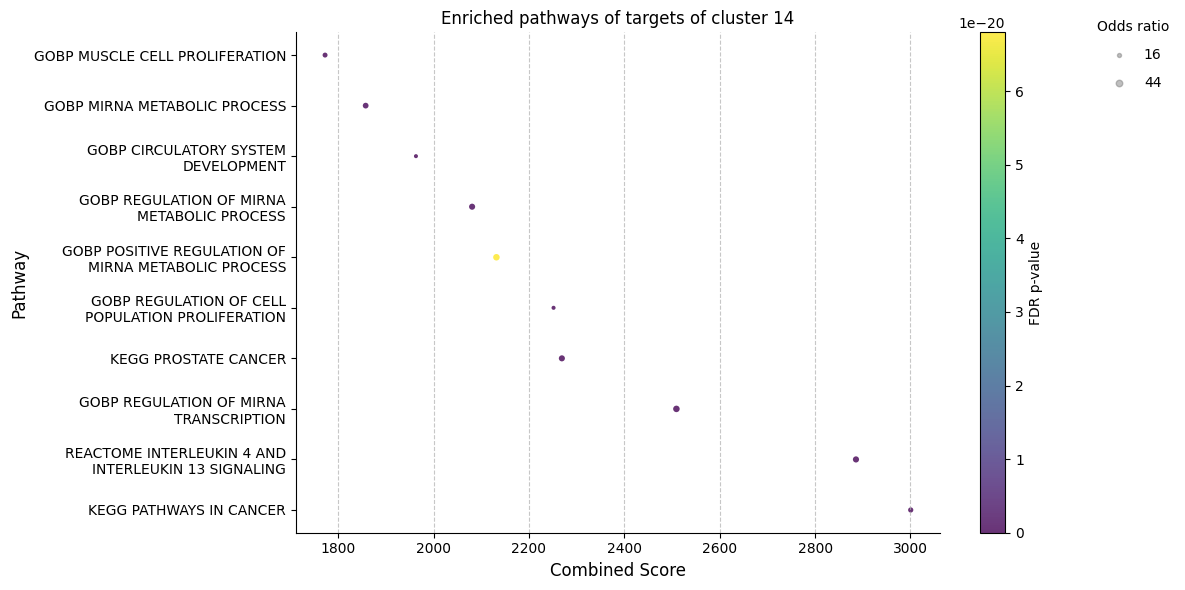

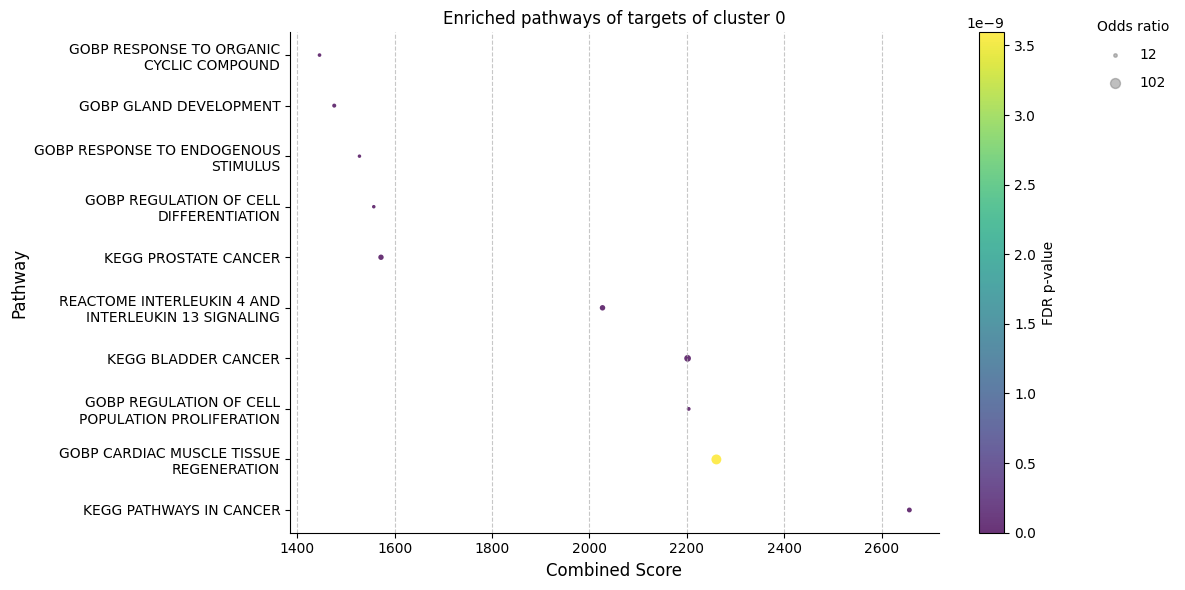

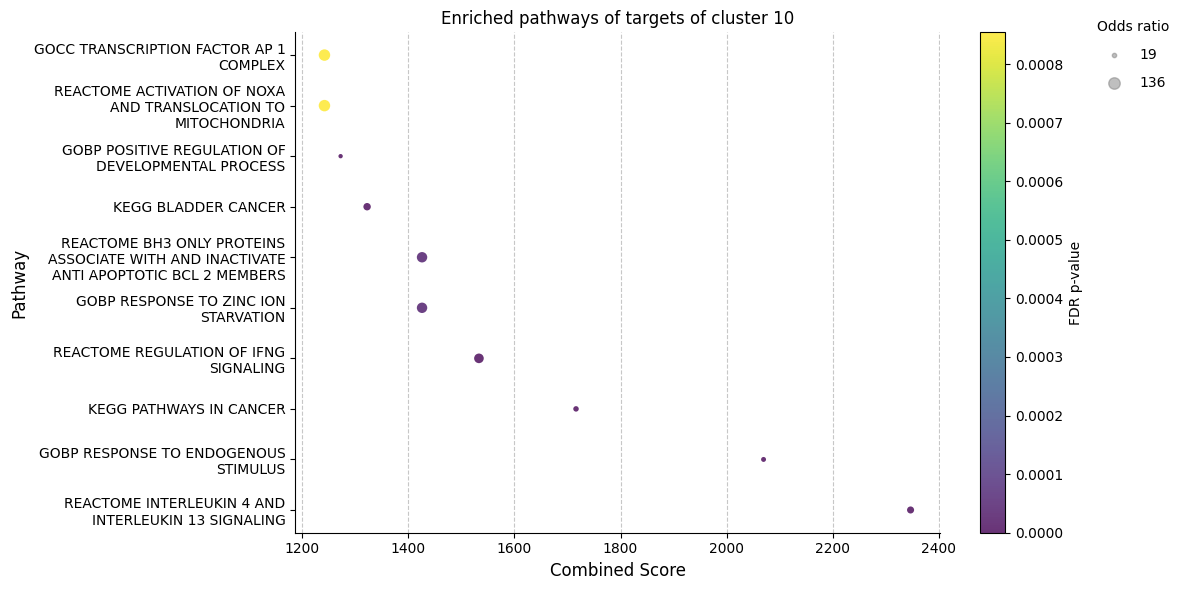

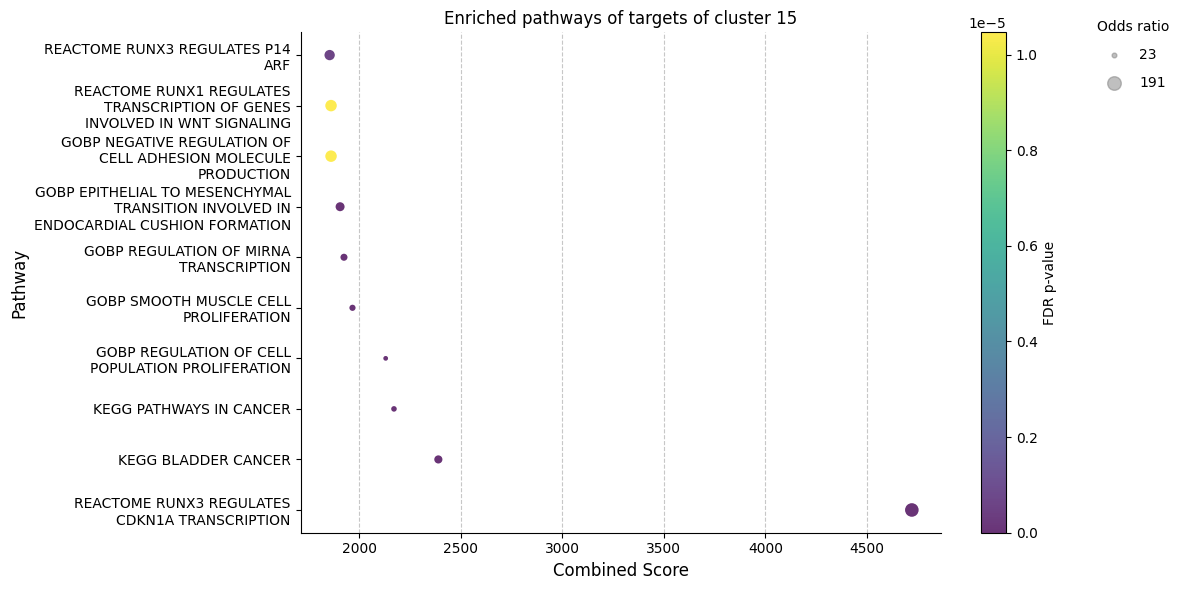

In [19]:
evaluation.create_report_clusters()

In [21]:
genes = mirna_network.network.nodes
genes = list(set(genes))

If the user desires to see the genes selected on the output of miRKat Network, it can be done using the filters, the program already gives the filter to use, just to copy and paste :)

In [24]:
len(genes)


802

Finally, we can have a look on the enriched pathways on the network overall

In [33]:
import decoupler as dc
from mirkitten.plot_GSEA_ORA import plot_ora_results

In [28]:
enriched = dc.get_ora_df(
            df=genes,
            net=evaluation.msigdb,
            source='geneset',
            target='genesymbol'
        )

In [29]:
pathway_df = enriched[enriched['FDR p-value'] < 0.1]
pathway_df.index = pathway_df["Term"]
#pathway_df.set_index("Term", inplace=True)  # Set "Term" as index
enriched_pathways = pathway_df['Combined score']

In [31]:
pathway_df

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
Term,,,,,,,,
GOBP_ACIDIC_AMINO_ACID_TRANSPORT,GOBP_ACIDIC_AMINO_ACID_TRANSPORT,61,0.131148,2.900560e-03,0.006907,3.468679,20.266979,GJA1;ITGB1;NF1;NTRK2;PER2;PSEN1;SNCA;TNF
GOBP_ACID_SECRETION,GOBP_ACID_SECRETION,47,0.106383,3.921495e-02,0.067605,2.897060,9.382700,CASR;NF1;OXT;OXTR;TNF
GOBP_ACINAR_CELL_DIFFERENTIATION,GOBP_ACINAR_CELL_DIFFERENTIATION,5,0.600000,6.046056e-04,0.001673,15.915459,117.948417,CTNNB1;NR5A2;PROX1
GOBP_ACTIN_CYTOSKELETON_REORGANIZATION,GOBP_ACTIN_CYTOSKELETON_REORGANIZATION,113,0.088496,1.543053e-02,0.030129,2.321530,9.684049,BCAR1;FGF10;GRB2;KIT;NRP1;NTF3;NTRK3;PDGFRA;RH...
GOBP_ACTIN_FILAMENT_BASED_MOVEMENT,GOBP_ACTIN_FILAMENT_BASED_MOVEMENT,126,0.079365,3.032442e-02,0.054149,2.081592,7.276835,ACTA2;GATA4;GJA1;GJA5;MYH6;MYH7;NEDD4L;PIK3CA;...
...,...,...,...,...,...,...,...,...
REACTOME_VISUAL_PHOTOTRANSDUCTION,REACTOME_VISUAL_PHOTOTRANSDUCTION,100,0.080000,4.764855e-02,0.080857,2.118473,6.448427,APOA1;APOB;APOC3;APOE;BCO1;LDLR;PLB1;RHO
REACTOME_WNT_LIGAND_BIOGENESIS_AND_TRAFFICKING,REACTOME_WNT_LIGAND_BIOGENESIS_AND_TRAFFICKING,26,0.230769,4.717837e-04,0.001352,6.151168,47.111738,WNT1;WNT2;WNT2B;WNT4;WNT5A;WNT8B
REACTOME_XENOBIOTICS,REACTOME_XENOBIOTICS,23,0.260870,2.292457e-04,0.000698,6.937466,58.140932,AHR;ARNT;CYP1A1;CYP2B6;CYP2C9;CYP3A4


/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Top 10 ORA Results by Combined Score'}, xlabel='Combined Score', ylabel='Pathway'>)

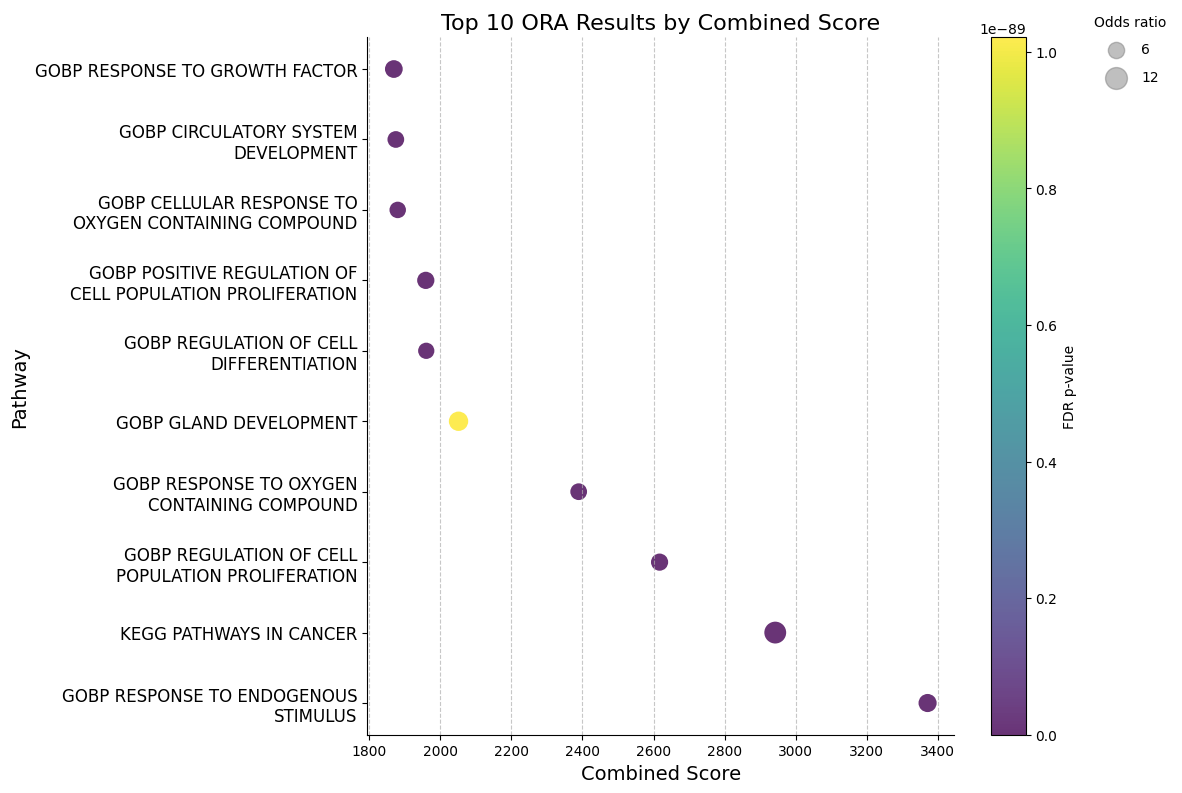

In [35]:
plot_ora_results(pathway_df, top_n=10, figsize=(12, 8), scale_odds_ratio=20, 
                     fontsize_title=16, fontsize_subtitle=14, fontsize_text=12,)

In [36]:
pathway_df_no_cancer = pathway_df[~pathway_df['Term'].str.contains('cancer', case=False)]

/home/karen/Documents/GitHub/Muscle_wasting/mirkitten/plot_GSEA_ORA.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ora_top['Term'], fontsize=fontsize_text)


(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Top 10 ORA Results by Combined Score'}, xlabel='Combined Score', ylabel='Pathway'>)

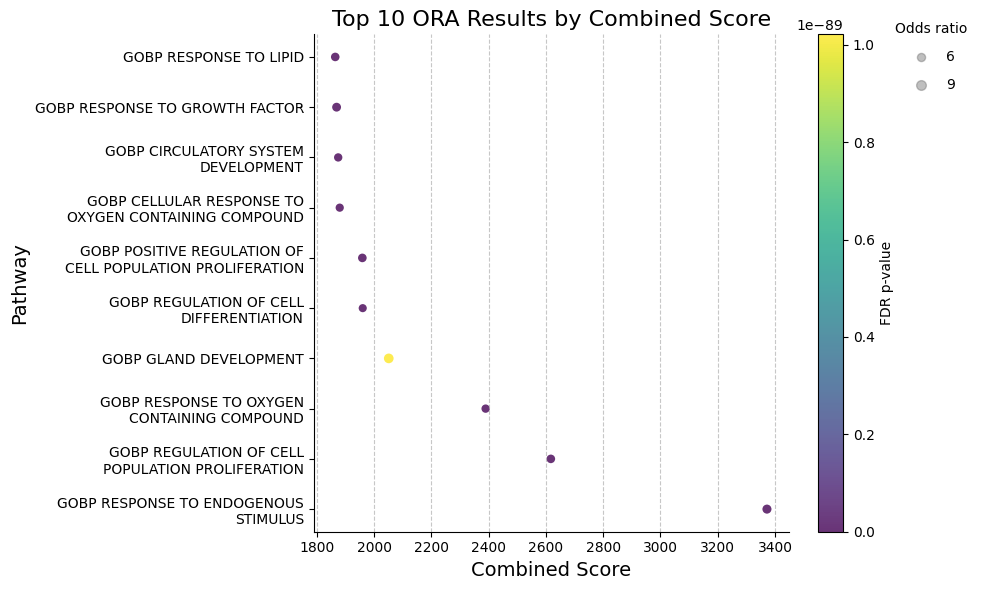

In [37]:
plot_ora_results(pathway_df_no_cancer, top_n=10, figsize=(10, 6), scale_odds_ratio=5, 
                     fontsize_title=16, fontsize_subtitle=14, fontsize_text=10,)

Plot the clusters

In [44]:
mirnas_selected = list(set(aa))
mirna_clusters = evaluation.clustered_mirnas

In [46]:
mirna_clusters

{3: ['hsa-miR-124-3p'],
 13: ['hsa-miR-106a-5p', 'hsa-miR-20a-5p'],
 14: ['hsa-miR-150-5p', 'hsa-miR-107'],
 0: ['hsa-miR-218-5p', 'hsa-miR-9-5p', 'hsa-miR-15a-5p'],
 10: ['hsa-miR-106b-5p'],
 15: ['hsa-miR-130a-3p']}

In [45]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
selected_dist_df = dist_df.loc[mirnas_selected, mirnas_selected]
# Compute UMAP embedding
reducer = umap.UMAP(metric="precomputed", random_state=42)
embedding = reducer.fit_transform(selected_dist_df)

# Create a dataframe with UMAP results and cluster labels

plot_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=selected_dist_df.index)
plot_df['Cluster'] = mirna_clusters['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=plot_df, palette='tab10', alpha=0.7)

# Add labels for each miRNA
for i, txt in enumerate(plot_df.index):
    plt.annotate(txt, (plot_df['UMAP1'][i], plot_df['UMAP2'][i]), fontsize=8, alpha=0.7)

plt.title("UMAP Visualization of Spectral Clustering")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.show()


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


KeyError: 'Cluster'

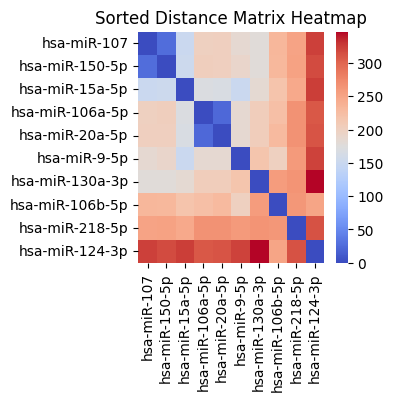

In [47]:
mi_plot.plot_mirnas_similarirty(selected_dist_df)

In [51]:
fractions = mirna_network.get_minra_influence_as_fraction(mirna='hsa-miR-34a-5p', gene='AXIN2')

In [52]:
fractions

['-1/1',
 '-1/3',
 '-1/18',
 '-1/19',
 '1/24',
 '-1/44',
 '-1/51',
 '1/54',
 '1/100',
 '-1/100',
 '-1/100',
 '-1/100',
 '-1/100']